In [1]:
import pandas as pd
import numpy as np
import os

# Import the Data
https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/data?select=train.csv

In [2]:
print(os.getcwd())

/Users/asaf/Google Drive/Work/Python Scripts


In [3]:
df_train = pd.read_csv("/Users/asaf/Downloads/train.csv")
df_train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


Class 0: 573518
Class 1: 21694
Proportion: 26.44 : 1


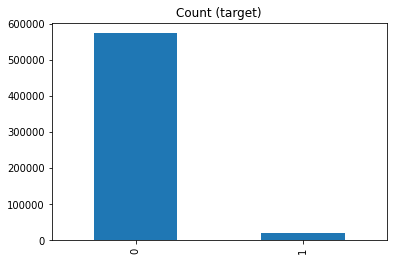

In [4]:
target_count = df_train.target.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)')

# Random under-sampling

In [5]:
# Class count
count_class_0, count_class_1 = df_train.target.value_counts()

# Divide by class
df_class_0 = df_train[df_train['target'] == 0]
df_class_1 = df_train[df_train['target'] == 1]

Random under-sampling:
1    21694
0    21694
Name: target, dtype: int64


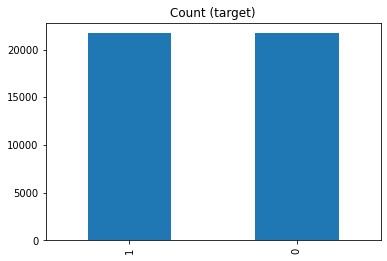

In [6]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.target.value_counts())

df_test_under.target.value_counts().plot(kind='bar', title='Count (target)')

# Random over-sampling


Random over-sampling:
1    573518
0    573518
Name: target, dtype: int64


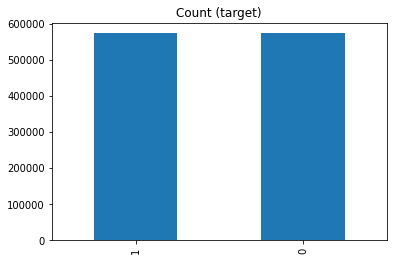

In [7]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.target.value_counts())

df_test_over.target.value_counts().plot(kind='bar', title='Count (target)')

# Python imbalanced-learn module


## Random under-sampling

In [8]:
X = df_train.drop('target', axis = 1)
y = df_train['target']

In [9]:
import imblearn
from matplotlib import pyplot as plt


In [10]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_rus, y_rus= rus.fit_sample(X, y)
print(y_rus.value_counts())


1    21694
0    21694
Name: target, dtype: int64


## Random over-sampling

In [11]:
from imblearn.over_sampling import RandomOverSampler


In [12]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

print(y_ros.value_counts())


1    573518
0    573518
Name: target, dtype: int64


# Over-sampling: SMOTE

SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picingk a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.



In [18]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, y)

print(y_sm.value_counts())


1    573518
0    573518
Name: target, dtype: int64


# Under-sampling: Tomek links (slow)

Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.

In [56]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')
X_tl, y_tl = tl.fit_sample(X, y)

print(y_tl.value_counts())


# Under-sampling: Cluster Centroids (slow)
 

This technique performs under-sampling by generating centroids based on clustering methods. The data will be previously grouped by similarity, in order to preserve information.

In [ ]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids()
X_cc, y_cc = cc.fit_sample(X, y)

print(y_cc.value_counts())
